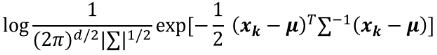

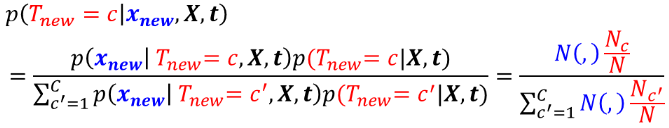

In [1]:
import numpy as np

class BayesClf:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._cov = np.zeros((n_classes, n_features, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            #print(X_c.shape)
            self._mean[idx, :] = X_c.mean(axis=0)
            self._cov[idx, :] = np.cov(X_c.T)
            self._priors[idx] = X_c.shape[0] / float(n_samples)            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []
        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            likelihood = np.log(self._pdf(idx, x))
            prior_likelihood = prior + likelihood
            posteriors.append(prior_likelihood)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx] # 1 x n_features
        cov = self._cov[class_idx]   # n_features x n_features
        inner = np.dot((x - mean),np.linalg.inv(cov)) # x is 1 x n_features
        print(inner, (x - mean).T)
        inner = np.dot(inner,(x - mean).T) 
        print(inner)
        numerator = np.exp(-0.5*inner)
        denominator = np.sqrt(2 * np.pi**len(x) * np.abs(np.linalg.det(cov)))
        
        #print('np.linalg.inv(cov)',np.linalg.inv(cov))
        
        #print('num',numerator)
        #print('det',np.linalg.det(cov))
        #print('den',denominator)
        return numerator / denominator

In [2]:
# Testing
from sklearn.model_selection import train_test_split
from sklearn import datasets

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_classification(
        n_samples=1000, n_features=10, n_classes=2, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123)

baclf = BayesClf()
baclf.fit(X_train, y_train)
predictions = baclf.predict(X_test)

print("Bayes classification accuracy", accuracy(y_test, predictions))

[ -1.12829879  -1.19405954  13.11492576  23.30927338   7.58678004
   0.8972611   -0.11683429   1.20705525 -11.58237595  -0.25418156] [-1.18265918 -1.07978845 -0.66232831  0.64813461 -1.18400886  0.6837519
 -0.21385061  1.08261955 -0.25067348 -0.03657153]
4.920031097104658
[-1.24177039 -1.23259557 -1.49415459 -1.46172697  0.0445405   1.11839891
 -0.34579352  1.0769489  -4.5291468  -0.29145119] [-1.17598508 -1.19407788 -1.1787554   0.30738147 -1.18333554  0.6940323
 -0.04217809  1.24822632 -2.32103095 -0.04901364]
16.85298806102571
[-0.22290237  1.28798832 -1.36693938 13.15192879  0.55965296 -1.52905354
  0.6785017   0.80144937  1.58123312  0.25497145] [-0.11438434  0.97224062 -0.51172285  1.14710343 -1.62051902 -1.15105926
  0.89914958  0.87785343  1.23856765  0.09452348]
21.213145403106978
[-0.01841     0.77571511 -3.07976047 -1.12377598  0.10018019 -1.07242935
  0.95760869  0.87421155 -0.87632328  0.0643113 ] [-0.10771024  0.85795118 -1.02814993  0.80635029 -1.6198457  -1.14077886
  1

In [3]:
# The folowings are tests

In [4]:
a=[-0.13590529,  0.19322743, -2.30276941, -1.53849343,  0.04230694,  1.09909363,
 -0.00705511, -0.33263172, -4.08357035, -0.83963213]
print(a)

[-0.13590529, 0.19322743, -2.30276941, -1.53849343, 0.04230694, 1.09909363, -0.00705511, -0.33263172, -4.08357035, -0.83963213]


In [5]:
b=[-0.00944623,  0.10160036, -0.89063972,  0.17894479, -0.83589676,  0.69128609,
   0.23238879, -0.34303112, -1.87183565, -0.80830769]
print(b)

[-0.00944623, 0.10160036, -0.89063972, 0.17894479, -0.83589676, 0.69128609, 0.23238879, -0.34303112, -1.87183565, -0.80830769]


In [6]:
np.dot(a,np.transpose(b))

10.955889362677725